# NNIA Assignment 1

**DEADLINE: 17. 11. 2021 08:00 CET**

- Trevor Atkins & trat00001 (Teams username: trat00001@uni-saarland.de): 
- Tsimafei Prakapenka & tspr00001 (Teams username e.g. tspr00001@uni-saarland.de):
- Hours of work per person: 

Trevor Atkins: ~ 1.5h

Tsimafei Prakapenka: ~3h
# Submission Instructions

**IMPORTANT** Please make sure you read the following instructions carefully. If you are unclear about any part of the assignment, ask questions **before** the assignment deadline. All course-related questions can be addressed on the course **[Piazza Platform](https://piazza.com/class/kvc3vzhsvh55rt)**

* Assignments are to be submitted in a **team of 2**.
* Please include your **names**, **ID's**, **Teams usernames**, and **approximate total time spent per person** at the beginning of the Notebook in the space provided
* Make sure you appropriately comment your code wherever required. 
* Your final submission should contain this completed Jupyter Notebook, including the bonus question (if you attempt it), and any necessary Python files.
* Do **not** submit any data or cache files (e.g. `__pycache__`).
* Upload the **zipped** folder (*.zip* is the only accepted extension) in **Teams**.
* Only **one member** of the group should make the submisssion.
* **Important** please name the submitted zip folder as: `Name1_id1_Name2_id2.zip`. The Jupyter Notebook should also be named: `Name1_id1_Name2_id2.ipynb`. This is **very important** for our internal organization epeatedly students fail to do this.

<font color="red">Failure to follow the above instructions will result in point penalties at the discretion of the instructors.</font>.

# 1 PCA (6p)

## 1.1 Reasoning about PCA (2p)

Consider two datasets of children $D_1$ and $D_2$ which consist of vectors with the following features:

- $D_1$: 
  - body weight
  - age (years)
  - age (months)

- $D_2$
  - body weight
  - age (years)
  - hours sleeping

Assume real-life reasonable correlations between features. Answer the following questions and justify your answers mathematically:

1. Would $D_1$ look the same if you projected it using PCA into a 3-dimensional space? (0.5p)
2. What is a reconstruction error? (0.5p)
3. What is the reconstruction error of $k$-dimensional dataset reduced to $k$ dimensions and then reconstructed? (0.5p)
4. What would be the difference in reconstruction error of a projection into 2-dimensional space of $D_1$ and $D_2$ (separately)? (0.5p)

## 1.1 <font color="green">Solution</font> 

1. No, $D_1$ would not look the same if projected using PCA into a 3-dimensional space because the dataset consists of 3 vectors but 2 vectors will be on the same axis of age just on a different scale. Moreover, after standartization I assume that age in years in months will be equal points of data (in case if years are not rounded up or down and represented as floats).

2. A reconstruction error is the distance between the original data point and the estimate of the projection onto a lower dimensional subspace.

3. 0.

4. I assume that reconstruction error after projection to 2-d space will be higher for $D_2$, since original data contains three radically different features. It is hard to reconstruct them fully using only 2 principal components. On the other hand, age in years in months contains exactly the same underlying information, then $D_1$ projection into 2-d space will contain all the key features from original data.


In [1]:
#@title Here is a small demo for 1.1.1.
import numpy as np

x_years = np.array([22.5, 14.25, 16, 15, 18.75, 19], 'float')
y_months = np.array([x * 12 for x in x_years], 'float')


def standartize(x):
    numerator = x - x.mean()
    denominator = np.std(x)

    return numerator / denominator


print(standartize(x_years))
print(standartize(y_months))

[ 1.74132994 -1.18056267 -0.56076727 -0.91493607  0.41319694  0.50173914]
[ 1.74132994 -1.18056267 -0.56076727 -0.91493607  0.41319694  0.50173914]


## 1.2 Coding PCA (4p)

1. Read in detail the following [blog post](https://builtin.com/data-science/step-step-explanation-principal-component-analysis) and write in pseudo-code how PCA works (5-20 lines, you can use _find largest principal component_ as an elementary operation). For your answer use ` ``` ` (backticks) to format your pseudo-code. (Note that many resources for PCA use the terms "normalization" to mean "standardization", not scaling to a unit norm.) (1p)
2. The file `birds.csv` contains a dataset of birds with two features: wing span and body mass. This is a very simplified dataset of 20 samples taken from the [Birds of Minesota Dataset](https://github.com/microsoft/Data-Science-For-Beginners/blob/main/data/birds.csv) (2p).
 - Load the data into your script
 - Run PCA into 1 dimension
 - Reconstruct the original data
 - Compute reconstruction error
3. Plot the following (2p): 
 - Original data
 - Pre-processed data
 - Data projected into 1D using PCA
 - Reconstructed data
 - Reconstructed data + post-processing (mean, sd)




## 1.2 <font color="green">Solution</font>

### 1.2.1
``` 
function standartize(vector, data)
    return (vector - data.mean()) / data.std()

function PCA(data, k)

    Initialize StandartizedData variable by standartizing (code above) each vector from input data
    create covariance matrix A from StandartizedData
    find eigenvectors and eigenvalues for matrix A

    create FeatureVector by sorting eigenvectors with correspoding eigenvalues as a key 
    reinitialize FeatureVector by selecting first k columns from it (if k < n)

    create ReconstructedDataset by multiplying transposed FeatureVector and transposed StandartizedData

    return ReconstructedDataset
```

###1.2.2 PCA to 1 dimension of the `birds.csv` data###



In [2]:
import os
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import fetch_california_housing
from math import sqrt
from typing import Tuple

In [3]:
%%capture
# Load the data into your script
if not os.path.isfile('birds.csv'):
    ! wget https://raw.githubusercontent.com/tsimafeip/LCT-master-course/main/UdS/Neural_Networks/birds.csv

In [4]:
with open('birds.csv', 'r') as file:
    csv_content = csv.reader(file)
    headers = next(csv_content)
    data = [[float(body_mass), float(wingspan)] for body_mass, wingspan in csv_content]
    data_df = pd.DataFrame(data, columns=headers)
    print(data_df.head())

   BodyMass  Wingspan
0    1020.0      94.0
1    1050.0      93.0
2    4050.0     165.0
3    1567.0     116.0
4    3310.0     165.0


In [5]:
def reconstruct_with_PCA(data: pd.DataFrame, number_of_components: int) -> Tuple[pd.DataFrame, float]:
    """Reconstruct data using PCA and returns new data and the value of reconstruction error."""
    standartized_data = StandardScaler().fit_transform(data.values)

    pca = PCA(n_components=number_of_components)
    pca.fit(standartized_data)

    #print(pca.get_covariance())
    #print(pca.components_)
    # print(pca.singular_values_)

    # Reconstruct the original data with native function or using pca.components_ @ np.transpose(standartized_data)
    data_from_pca = pca.transform(standartized_data)

    reconstructed_data = pca.inverse_transform(data_from_pca)
    loss = np.sum((standartized_data - reconstructed_data) ** 2, axis=1).mean()
    return standartized_data, data_from_pca, reconstructed_data, loss, pca.explained_variance_ratio_

In [6]:
standartized_data, data_from_pca, reconstructed_data, loss, explained_variance_ratio = reconstruct_with_PCA(data_df, 1)
print("Reconstruction error: ",  loss)
print("Explained variance ratio: ", explained_variance_ratio[0])

Reconstruction error:  0.05033948632825883
Explained variance ratio:  0.9748302568358705


### 1.2.3 Plotting

In [7]:
def scatter_plot2d(data_2d, headers):
  x = [row[0] for row in data_2d]
  y = [row[1] for row in data_2d]
  plt.scatter(x, y)
  plt.xlabel(headers[0])
  plt.ylabel(headers[1])
  plt.show()

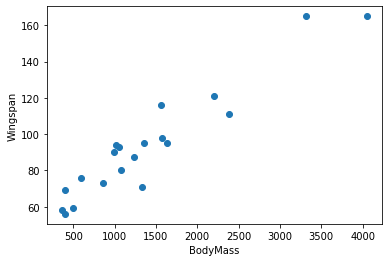

In [8]:
# Original data
scatter_plot2d(data, data_df.columns)

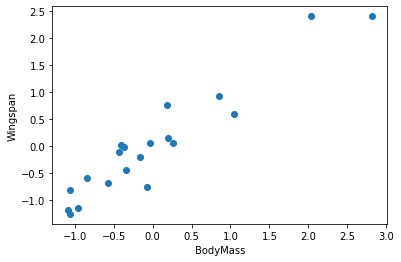

In [9]:
#Pre-processed data
scatter_plot2d(standartized_data, data_df.columns)

In [10]:
data_from_pca.T[0]

array([-0.2729737 , -0.27420497,  3.68609446,  0.65974973,  3.13085812,
        1.25340615,  1.15105513, -0.89008204, -1.331693  , -1.61535195,
       -1.64032407, -1.01544317, -0.39044669, -0.56557869, -0.58641428,
        0.24216856,  0.21596516, -0.26859091,  0.00587574, -1.49406958])

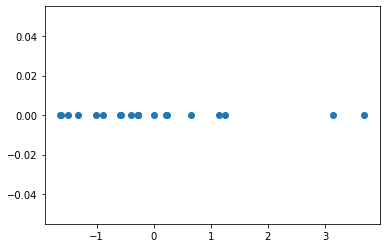

In [11]:
#Data projected into 1D using PCA
plt.scatter(data_from_pca.T[0], [0]*len(data_from_pca.T[0]))

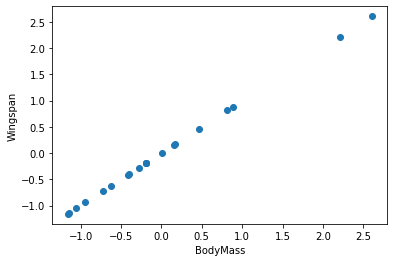

In [12]:
#Reconstructed data
scatter_plot2d(reconstructed_data, data_df.columns)

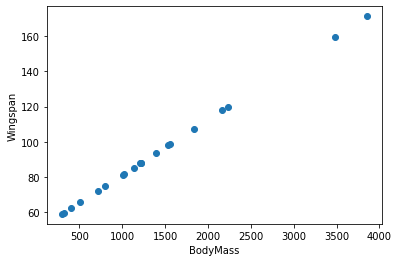

In [13]:
#Reconstructed data + post-processing (mean, sd)
posprocessed_data = reconstructed_data * np.std(data, axis=0) + np.mean(data, axis=0)
scatter_plot2d(posprocessed_data, data_df.columns)

# 2 SVD and PCA (2 points)

## 2.1 PCA in relation to SVD (1 point)
Can Singular Value Decomposition (SVD) be used for dimensionality reduction as well? Why, why not?


## 2.2 Other Applications (1 point)
Describe (shortly, without mathematical details) at least two other machine learning methods
that use eigendecomposition or single value decomposition. Provide the source where you found the information. 






## 2 <font color="green">Solution</font>

2.1) Singular Value Decomposition (SVD) can be used for dimensionality reduction as well. With a given decomposition of a $m \times n$ matrix $M$ into $U$, $S$, and $V$, an approximation of the original matrix $M$ can be reconstructed. The values in the diagonal matrix $S$ can be used to find variance of each singular vector.

2.2) Fisher discriminant analysis also uses eigendecomposition to find a separating hyperplane for data classification. <br>
Source: https://www.pnas.org/content/106/2/369

Latent semantic analysis uses SVD for more efficiency with search and storage. <br>
Source: https://ieeexplore.ieee.org/abstract/document/7960038
 

# 3 Component Selection (2 points)
Load the built-in `California Housing Dataset` from `sklearn` and compute PCA of 1 to 14 dimensions (principal components). Plot a graph _reconstruction error_ $\times$ _number of principal components_. How many principal components (dimensions) would you use for your compression?

For more information on the dataset, please refer to the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)

## 3 <font color="green">Solution</font>


In [14]:
california_housing_full = fetch_california_housing(as_frame=True)
print(california_housing_full.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [15]:
house_df = california_housing_full.frame
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
losses = []
variances = []
max_number_of_components = min(len(house_df.columns), 14)

for number_of_components in range(max_number_of_components):
    _, _, _, loss, explained_variance = reconstruct_with_PCA(house_df, number_of_components+1)
    losses.append(loss)
    variances.append(sum(explained_variance))

In [17]:
print(losses)
print(variances)

[6.963332766382995, 4.988065167308273, 3.3760681841071443, 2.1062232964088254, 1.1031669715639005, 0.41099991750021947, 0.10750225750178062, 0.04379799988232926, 4.503965399693554e-30]
[0.22629635929077824, 0.4457705369657473, 0.6248813128769833, 0.7659751892879078, 0.8774258920484547, 0.9543333424999748, 0.9880553047220235, 0.9951335555686299, 0.9999999999999999]


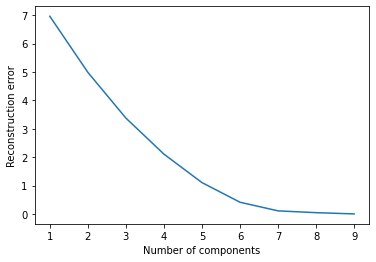

In [18]:
plt.xlabel('Number of components')
plt.ylabel('Reconstruction error')
plt.plot(range(1, max_number_of_components+1), losses)

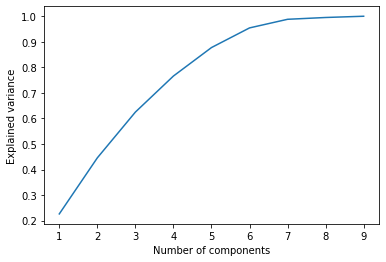

In [19]:
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.plot(range(1, max_number_of_components+1), variances)

I would use 5 or 6 components depending on the task and goal, since 87%/95% of explained variance is a good value.

# Bonus: PCA from scratch (2 points)

If you used sklearn's implementation to complete the previous exercises, try following the pseudocode you've written and implement PCA without using an existing library implementation. You may use built-in/library functions for matrix operations.

In [20]:
def standartize(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)


def my_pca(data, number_of_components):
    standartized_data = standartize(data.values)
    cov_matrix = np.cov(standartized_data.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    #print(eigenvalues, eigenvectors)

    pairs = []
    for value, vector in zip(eigenvalues, eigenvectors):
        pairs.append((value, vector))

    print(pairs)

    pairs.sort(key=lambda x: x[0], reverse=True)
    feature_vector = np.transpose([pairs[i][1] for i in range(number_of_components)])
    print(feature_vector)

    data_from_pca = standartized_data @ feature_vector
    reconstructed_data = data_from_pca @ feature_vector.T

    return standartized_data, np.array(data_from_pca), np.array(reconstructed_data)

In [21]:
my_standartized, my_data_from_pca, my_reconstructed_data = my_pca(data_df, 1)

[(0.05298893297711438, array([-0.70710678, -0.70710678])), (2.052274224917621, array([ 0.70710678, -0.70710678]))]
[[ 0.70710678]
 [-0.70710678]]


In [22]:
print(standartized_data[:5], my_standartized[:5])

[[-0.39913722  0.01309411]
 [-0.36730386 -0.02048053]
 [ 2.81603166  2.39689312]
 [ 0.18129096  0.75173606]
 [ 2.0308089   2.39689312]] [[-0.39913722  0.01309411]
 [-0.36730386 -0.02048053]
 [ 2.81603166  2.39689312]
 [ 0.18129096  0.75173606]
 [ 2.0308089   2.39689312]]
